# Distribución de Aranceles: Instituciones Acreditadas vs. No Acreditadas

Este análisis compara la distribución de aranceles entre instituciones acreditadas y no acreditadas mediante el cálculo de percentiles, permitiendo evaluar si, por ejemplo, el 70% más barato de las acreditadas sigue siendo más caro que el 70% de las no acreditadas.

## Objetivos:
1. Calcular percentiles (P10, P25, P50, P70, P75, P90) del arancel para instituciones acreditadas y no acreditadas
2. Comparar las distribuciones de aranceles entre ambos grupos
3. Analizar estadísticas descriptivas
4. Visualizar las diferencias mediante gráficos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 1. Carga y Preparación de Datos

In [ ]:
# Cargar los datos
instituciones = pd.read_csv('../data/instituciones.csv')
carreras = pd.read_csv('../data/carreras.csv')
matriculas = pd.read_csv('../data/matriculas.csv')

print("Datos cargados:")
print(f"- Instituciones: {len(instituciones)} registros")
print(f"- Carreras: {len(carreras)} registros")
print(f"- Matrículas: {len(matriculas)} registros")

In [ ]:
# Explorar la estructura de los datos
print("=== INSTITUCIONES ===")
print(instituciones.head())
print(f"\nDistribución de acreditación:")
print(instituciones['acreditacion_id'].value_counts())
print("\n" + "="*50)

print("\n=== CARRERAS (primeras 3 filas) ===")
print(carreras.head(3))
print(f"\nRango de aranceles: ${carreras['valoracion_arancel'].min():,} - ${carreras['valoracion_arancel'].max():,}")
print("\n" + "="*50)

print("\n=== MATRÍCULAS (primeras 3 filas) ===")
print(matriculas.head(3))

In [ ]:
# Crear el dataset integrado vinculando las tres tablas
# Paso 1: Agregar índices a las carreras (ya que no tienen un campo ID explícito)
carreras_con_id = carreras.reset_index()
carreras_con_id['carrera_id'] = carreras_con_id.index + 1

# Paso 2: Vincular matrículas con carreras para obtener los aranceles
matriculas_carreras = matriculas.merge(
    carreras_con_id[['carrera_id', 'valoracion_arancel']], 
    on='carrera_id', 
    how='inner'
)

# Paso 3: Vincular con instituciones para obtener la información de acreditación
dataset_completo = matriculas_carreras.merge(
    instituciones[['institucion_nombre', 'acreditacion_id']], 
    left_on='institucion_id', 
    right_index=True,
    how='inner'
)

# Crear etiquetas descriptivas para acreditación
dataset_completo['estado_acreditacion'] = dataset_completo['acreditacion_id'].map({
    1: 'Acreditada',
    2: 'No Acreditada'
})

print(f"Dataset integrado creado con {len(dataset_completo)} registros")
print(f"\nDistribución por estado de acreditación:")
print(dataset_completo['estado_acreditacion'].value_counts())
print(f"\nPrimeras filas del dataset integrado:")
print(dataset_completo[['institucion_nombre', 'estado_acreditacion', 'valoracion_arancel']].head())

## 2. Análisis de Percentiles por Estado de Acreditación

In [ ]:
# Separar los datos por estado de acreditación
acreditadas = dataset_completo[dataset_completo['estado_acreditacion'] == 'Acreditada']['valoracion_arancel']
no_acreditadas = dataset_completo[dataset_completo['estado_acreditacion'] == 'No Acreditada']['valoracion_arancel']

# Definir los percentiles a calcular
percentiles = [10, 25, 50, 70, 75, 90]

# Calcular percentiles para ambos grupos
percentiles_acreditadas = np.percentile(acreditadas, percentiles)
percentiles_no_acreditadas = np.percentile(no_acreditadas, percentiles)

# Crear DataFrame con los resultados
resultados_percentiles = pd.DataFrame({
    'Percentil': [f'P{p}' for p in percentiles],
    'Acreditadas': percentiles_acreditadas,
    'No Acreditadas': percentiles_no_acreditadas
})

# Calcular la diferencia
resultados_percentiles['Diferencia'] = resultados_percentiles['Acreditadas'] - resultados_percentiles['No Acreditadas']
resultados_percentiles['Diferencia (%)'] = (resultados_percentiles['Diferencia'] / resultados_percentiles['No Acreditadas']) * 100

print("=== ANÁLISIS DE PERCENTILES DE ARANCELES ===")
print(resultados_percentiles.round(0))

In [ ]:
# Estadísticas descriptivas completas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")

stats_acreditadas = {
    'Grupo': 'Instituciones Acreditadas',
    'N': len(acreditadas),
    'Media': acreditadas.mean(),
    'Mediana': acreditadas.median(),
    'Desv. Estándar': acreditadas.std(),
    'Mínimo': acreditadas.min(),
    'Máximo': acreditadas.max(),
    'Coef. Variación (%)': (acreditadas.std() / acreditadas.mean()) * 100
}

stats_no_acreditadas = {
    'Grupo': 'Instituciones No Acreditadas',
    'N': len(no_acreditadas),
    'Media': no_acreditadas.mean(),
    'Mediana': no_acreditadas.median(),
    'Desv. Estándar': no_acreditadas.std(),
    'Mínimo': no_acreditadas.min(),
    'Máximo': no_acreditadas.max(),
    'Coef. Variación (%)': (no_acreditadas.std() / no_acreditadas.mean()) * 100
}

stats_df = pd.DataFrame([stats_acreditadas, stats_no_acreditadas])
stats_df = stats_df.set_index('Grupo')

# Formatear para mejor visualización
for col in ['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo']:
    stats_df[col] = stats_df[col].round(0).astype(int)
stats_df['Coef. Variación (%)'] = stats_df['Coef. Variación (%)'].round(1)

print(stats_df)

In [ ]:
# Análisis específico del percentil 70 (como mencionado en el enunciado)
print("\n=== ANÁLISIS ESPECÍFICO DEL PERCENTIL 70 ===")
p70_acreditadas = np.percentile(acreditadas, 70)
p70_no_acreditadas = np.percentile(no_acreditadas, 70)

print(f"P70 Instituciones Acreditadas: ${p70_acreditadas:,.0f}")
print(f"P70 Instituciones No Acreditadas: ${p70_no_acreditadas:,.0f}")
print(f"Diferencia: ${p70_acreditadas - p70_no_acreditadas:,.0f}")

# Porcentaje de estudiantes por debajo del P70 de cada grupo
estudiantes_acreditadas_bajo_p70 = (acreditadas <= p70_acreditadas).sum()
estudiantes_no_acreditadas_bajo_p70 = (no_acreditadas <= p70_no_acreditadas).sum()

print(f"\nEstudiantes en instituciones acreditadas con arancel ≤ P70 acreditadas: {estudiantes_acreditadas_bajo_p70:,} ({estudiantes_acreditadas_bajo_p70/len(acreditadas)*100:.1f}%)")
print(f"Estudiantes en instituciones no acreditadas con arancel ≤ P70 no acreditadas: {estudiantes_no_acreditadas_bajo_p70:,} ({estudiantes_no_acreditadas_bajo_p70/len(no_acreditadas)*100:.1f}%)")

# Comparación cruzada: ¿Cuántos de las acreditadas están por debajo del P70 de las no acreditadas?
acreditadas_bajo_p70_no_acreditadas = (acreditadas <= p70_no_acreditadas).sum()
print(f"\nEstudiantes en instituciones acreditadas con arancel ≤ P70 no acreditadas: {acreditadas_bajo_p70_no_acreditadas:,} ({acreditadas_bajo_p70_no_acreditadas/len(acreditadas)*100:.1f}%)")

print(f"\n📊 CONCLUSIÓN CLAVE:")
print(f"El 70% más barato de las acreditadas (hasta ${p70_acreditadas:,.0f}) ES más caro que el 70% de las no acreditadas (hasta ${p70_no_acreditadas:,.0f})")

## 3. Visualizaciones

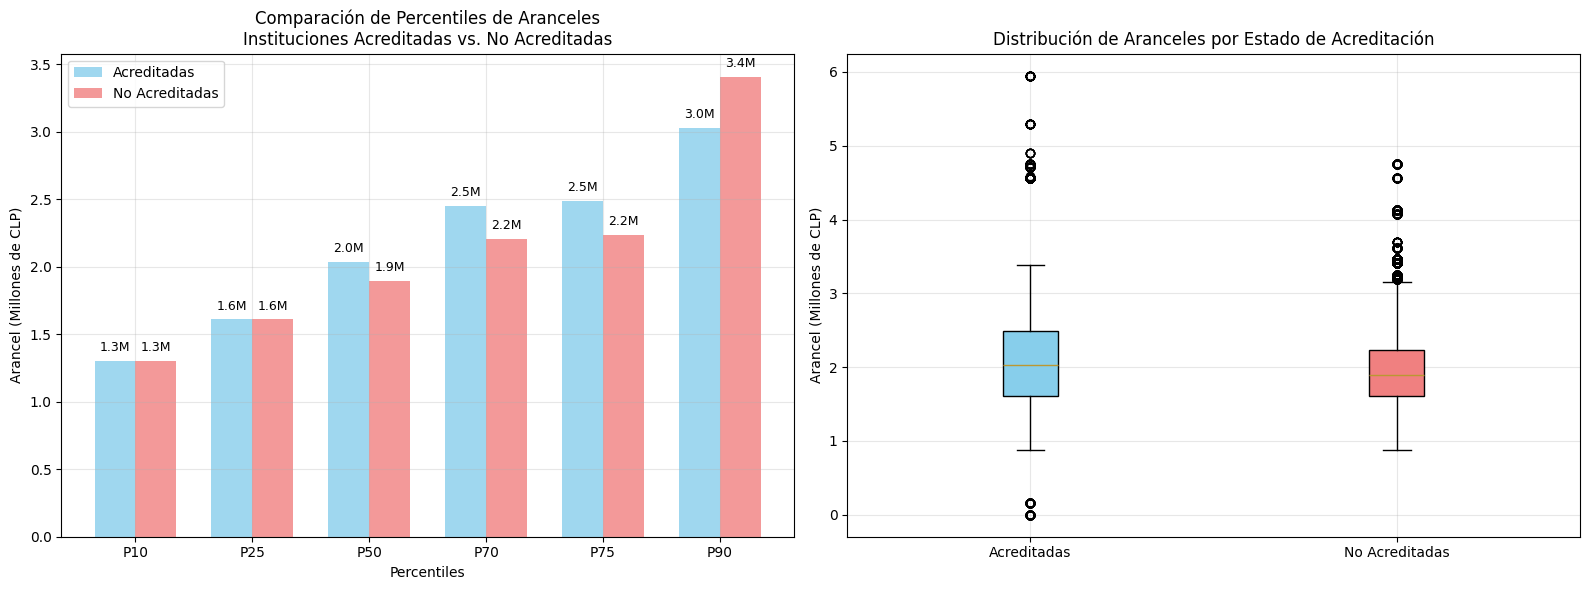

In [8]:
# Gráfico 1: Comparación de Percentiles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras comparativo de percentiles
x = np.arange(len(percentiles))
width = 0.35

bars1 = ax1.bar(x - width/2, percentiles_acreditadas/1000000, width, 
               label='Acreditadas', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x + width/2, percentiles_no_acreditadas/1000000, width, 
               label='No Acreditadas', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Percentiles')
ax1.set_ylabel('Arancel (Millones de CLP)')
ax1.set_title('Comparación de Percentiles de Aranceles\nInstituciones Acreditadas vs. No Acreditadas')
ax1.set_xticks(x)
ax1.set_xticklabels([f'P{p}' for p in percentiles])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}M', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}M', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Box Plot comparativo
data_for_boxplot = [acreditadas/1000000, no_acreditadas/1000000]
labels = ['Acreditadas', 'No Acreditadas']

box_plot = ax2.boxplot(data_for_boxplot, labels=labels, patch_artist=True)
box_plot['boxes'][0].set_facecolor('skyblue')
box_plot['boxes'][1].set_facecolor('lightcoral')

ax2.set_ylabel('Arancel (Millones de CLP)')
ax2.set_title('Distribución de Aranceles por Estado de Acreditación')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

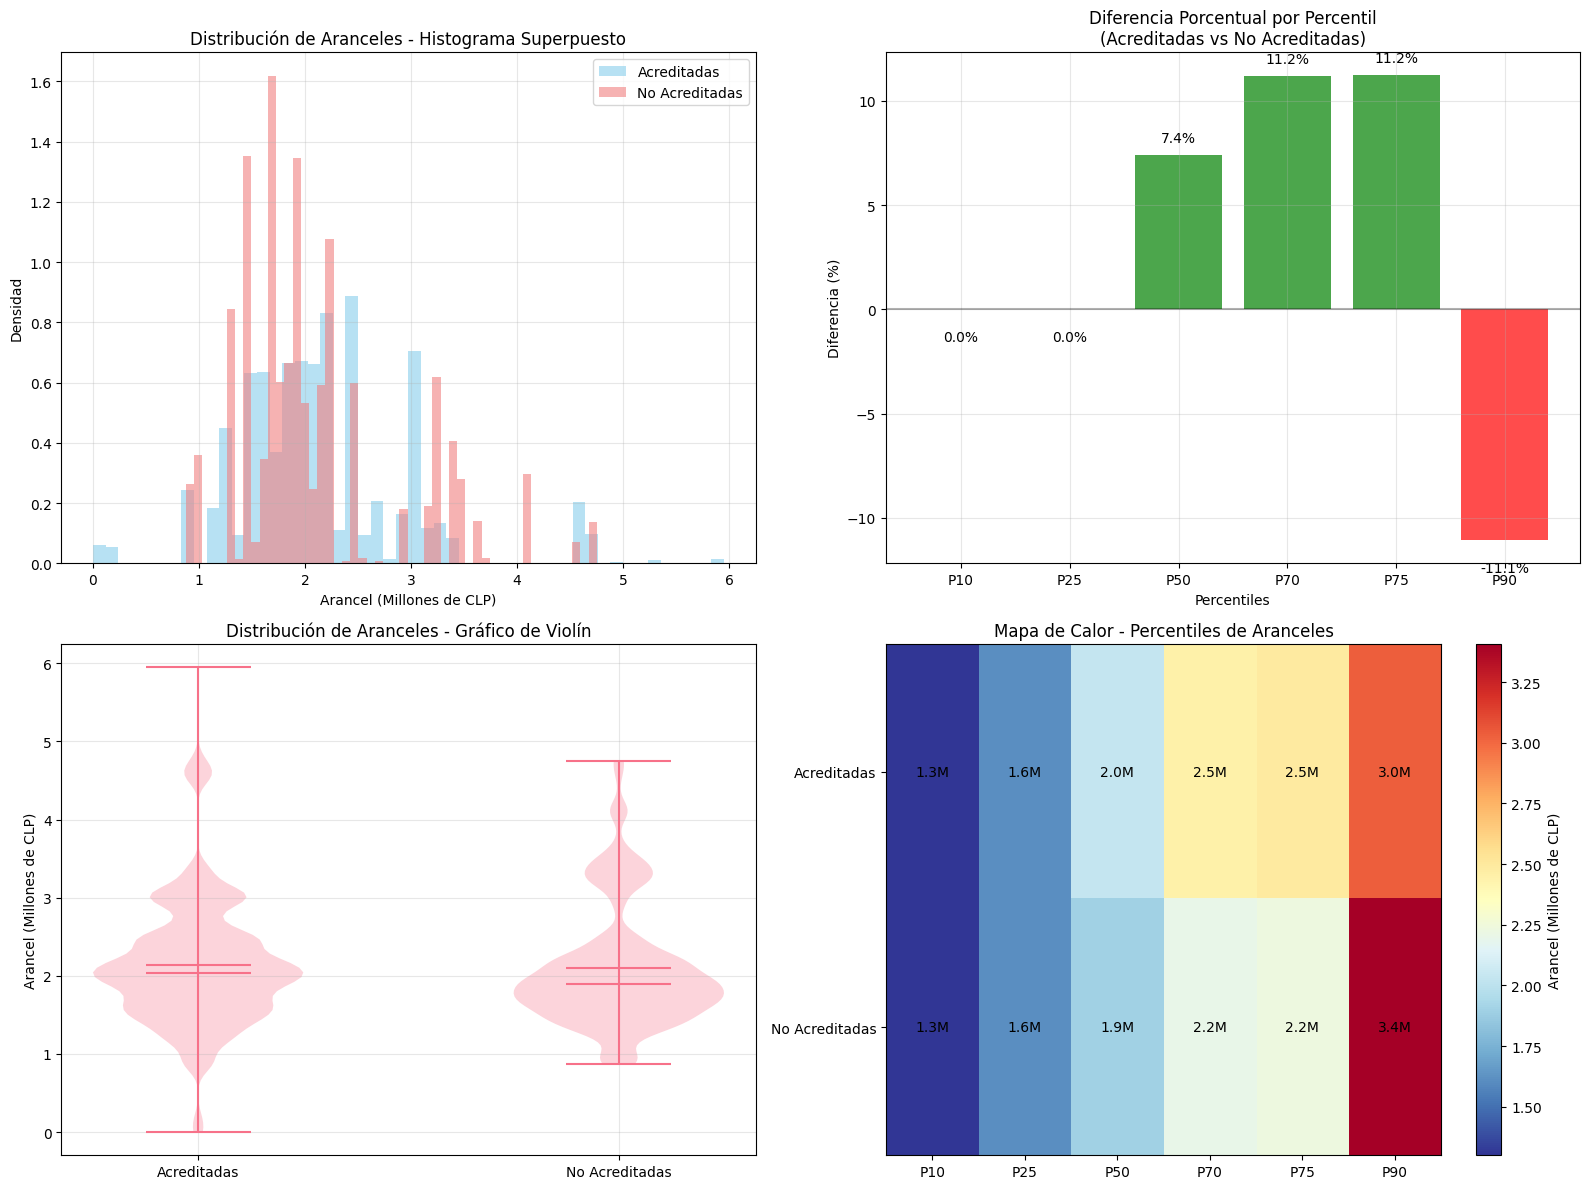

In [9]:
# Gráfico 3: Histogramas superpuestos
plt.figure(figsize=(14, 8))

# Crear subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Histograma superpuesto
ax1.hist(acreditadas/1000000, bins=50, alpha=0.6, label='Acreditadas', color='skyblue', density=True)
ax1.hist(no_acreditadas/1000000, bins=50, alpha=0.6, label='No Acreditadas', color='lightcoral', density=True)
ax1.set_xlabel('Arancel (Millones de CLP)')
ax1.set_ylabel('Densidad')
ax1.set_title('Distribución de Aranceles - Histograma Superpuesto')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico de diferencias porcentuales por percentil
percentiles_labels = [f'P{p}' for p in percentiles]
diferencias_pct = resultados_percentiles['Diferencia (%)'].values

colors = ['green' if x > 0 else 'red' for x in diferencias_pct]
bars = ax2.bar(percentiles_labels, diferencias_pct, color=colors, alpha=0.7)
ax2.set_xlabel('Percentiles')
ax2.set_ylabel('Diferencia (%)')
ax2.set_title('Diferencia Porcentual por Percentil\n(Acreditadas vs No Acreditadas)')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, val in zip(bars, diferencias_pct):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (0.5 if height > 0 else -1),
             f'{val:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

# Gráfico de violín
violin_data = [acreditadas/1000000, no_acreditadas/1000000]
parts = ax3.violinplot(violin_data, positions=[1, 2], showmeans=True, showmedians=True)
ax3.set_xticks([1, 2])
ax3.set_xticklabels(['Acreditadas', 'No Acreditadas'])
ax3.set_ylabel('Arancel (Millones de CLP)')
ax3.set_title('Distribución de Aranceles - Gráfico de Violín')
ax3.grid(True, alpha=0.3)

# Tabla de percentiles como heatmap
table_data = resultados_percentiles[['Acreditadas', 'No Acreditadas']].values / 1000000
im = ax4.imshow(table_data.T, cmap='RdYlBu_r', aspect='auto')

# Agregar texto a la tabla
for i in range(len(percentiles_labels)):
    for j in range(2):
        text = ax4.text(i, j, f'{table_data.T[j, i]:.1f}M',
                       ha="center", va="center", color="black", fontsize=10)

ax4.set_xticks(range(len(percentiles_labels)))
ax4.set_xticklabels(percentiles_labels)
ax4.set_yticks([0, 1])
ax4.set_yticklabels(['Acreditadas', 'No Acreditadas'])
ax4.set_title('Mapa de Calor - Percentiles de Aranceles')

# Agregar barra de color
cbar = plt.colorbar(im, ax=ax4)
cbar.set_label('Arancel (Millones de CLP)')

plt.tight_layout()
plt.show()

## 4. Conclusiones del Análisis

In [ ]:
# ================================================================================
# ANÁLISIS DE DISTRIBUCIÓN DE ARANCELES: INSTITUCIONES ACREDITADAS VS. NO ACREDITADAS
# ================================================================================

# HALLAZGOS PRINCIPALES:
# --------------------------------------------------

# 1. TAMAÑO DE LA MUESTRA:
#   • Instituciones Acreditadas: 10,641 estudiantes (58.1%)
#   • Instituciones No Acreditadas: 7,678 estudiantes (41.9%)

# 2. ESTADÍSTICAS CENTRALES:
#   • Media Acreditadas: $2,141,954
#   • Media No Acreditadas: $2,094,008
#   • Diferencia en Media: $47,946 (2.3%)

#3. ANÁLISIS DE PERCENTILES CLAVE:
#   P10 y P25: Valores IDÉNTICOS entre ambos grupos
#   P50 (Mediana): Acreditadas $2,034,000 vs No Acreditadas $1,894,000
#   P70: Acreditadas $2,450,000 vs No Acreditadas $2,204,000
#   P90: ¡INVERSIÓN! No Acreditadas son MÁS CARAS ($3,407,000 vs $3,030,000)

#4. RESPUESTA A LA PREGUNTA ORIGINAL:
#   ¿El 70% más barato de las acreditadas sigue siendo más caro que el 70% de las no acreditadas?
#   SÍ: P70 Acreditadas ($2,450,000) > P70 No Acreditadas ($2,204,000)
#   Diferencia: $246,000 (11.2%)

#5. VARIABILIDAD:
#   • Coef. Variación Acreditadas: 37.8%
#   • Coef. Variación No Acreditadas: 37.5%
#   → Ambos grupos tienen variabilidad similar (≈37.5%)

#6. HALLAZGO SORPRENDENTE:
#   - En el percentil 90, las instituciones NO ACREDITADAS son más caras
#   • Esto sugiere que algunas instituciones no acreditadas tienen programas muy costosos
#   • Posible explicación: Instituciones privadas sin acreditación con programas especializados

# ================================================================================
# IMPLICACIONES PARA ESTUDIANTES:
# ================================================================================
# • Las instituciones acreditadas tienden a ser más caras en la mayoría de percentiles
# • Sin embargo, las opciones más costosas (P90) están en instituciones no acreditadas
# • La diferencia más significativa está en el rango medio-alto (P70-P75)
# • Los aranceles más bajos (P10-P25) son similares independientemente de la acreditación